In [1]:
#import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import geoplot
import mapclassify

In [2]:
url = 'https://covid.saude.gov.br/'
path = os.path.abspath(os.getcwd())
print(path)
path = path + '\data'
try:
    os.mkdir(path)
except FileExistsError:
    pass

d:\GitRepos\tfTestes\covid


In [3]:
data = pd.read_excel('./data/HIST_PAINEL_COVIDBR_16jun2020.xlsx')

In [4]:
data['populacaoTCU2019'] = data['populacaoTCU2019'].fillna('0')
data['populacaoTCU2019'] = data['populacaoTCU2019'].str.split(pat='(', expand=True )
data['populacaoTCU2019'] = data['populacaoTCU2019'].str.replace('.','').astype(int)

In [5]:
cat_dia_semana = pd.CategoricalDtype(categories=['dom', 'seg', 'ter', 'qua', 'qui', 'sex', 'sab'], ordered=True)

In [6]:
data['dia_semana'] = data['data'].dt.dayofweek
data['dia_semana_nm'] = data['dia_semana'].replace({0:'seg', 1: 'ter', 2:'qua', 3:'qui', 4:'sex', 5:'sab', 6:'dom'}).astype(cat_dia_semana)


In [7]:
data.tail(10)

regiao estado municipio  coduf    codmun  codRegiaoSaude  \
397902  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
397903  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
397904  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
397905  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
397906  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
397907  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
397908  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
397909  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
397910  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
397911  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   

         nomeRegiaoSaude       data  semanaEpi  populacaoTCU2019  \
397902  DISTRITO FEDERAL 2020-06-07         24           3015268   
397903  DISTRITO FEDERAL 2020-06-08         24           3015268   
397904  DISTRITO FEDERAL 2020-06-09         24           3015268   
397905  DISTRITO FEDERAL 2020-06-10         24           3015268   
397906  DISTRITO FEDERAL 2020-06-11         24           3015268   
397907  DISTRITO FEDERAL 2020-06-12         24           3015268   
397908  DISTRITO FEDERAL 2020-06-13         24           3015268   
397909  DISTRITO FEDERAL 2020-06-14         25           3015268   
397910  DISTRITO FEDERAL 2020-06-15         25           3015268   
397911  DISTRITO FEDERAL 2020-06-16         25           3015268   

        casosAcumulado  casosNovos  obitosAcumulado  obitosNovos  \
397902           16623         773              214            6   
397903           16629           6              214            0   
397904           18090        1461              236           22   
397905           19433        1343              256           20   
397906           20507        1074              274           18   
397907           21396         889              282            8   
397908           21959         563              293           11   
397909           22871         912              304           11   
397910           23684         813              319           15   
397911           25380        1696              348           29   

        Recuperadosnovos  emAcompanhamentoNovos  dia_semana dia_semana_nm  
397902               NaN                    NaN           6           dom  
397903               NaN                    NaN           0           seg  
397904               NaN                    NaN           1           ter  
397905               NaN                    NaN           2           qua  
397906               NaN                    NaN           3           qui  
397907               NaN                    NaN           4           sex  
397908               NaN                    NaN           5           sab  
397909               NaN                    NaN           6           dom  
397910               NaN                    NaN           0           seg  
397911               NaN                    NaN           1           ter

In [9]:
data.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'dia_semana',
       'dia_semana_nm'],
      dtype='object')

In [10]:
data.describe()

coduf         codmun  codRegiaoSaude      semanaEpi  \
count  397912.000000  394748.000000   393190.000000  397912.000000   
mean       31.776232  319314.771915    31815.941606      19.055560   
std         9.875572   98405.669394     9820.200228       3.420591   
min        11.000000  110000.000000    11001.000000       9.000000   
25%        25.000000  250270.000000    25002.000000      16.000000   
50%        31.000000  313502.500000    31041.000000      19.000000   
75%        41.000000  411130.000000    41010.000000      22.000000   
max        76.000000  530010.000000    53001.000000      25.000000   

       populacaoTCU2019  casosAcumulado     casosNovos  obitosAcumulado  \
count      3.979120e+05   397912.000000  397912.000000    397912.000000   
mean       1.617137e+05      155.846403       6.960250         8.921679   
std        3.697214e+06     5622.075033     229.524916       316.030107   
min        0.000000e+00        0.000000   -1370.000000         0.000000   
25%        6.581000e+03        0.000000       0.000000         0.000000   
50%        1.406800e+04        1.000000       0.000000         0.000000   
75%        2.980600e+04        7.000000       0.000000         0.000000   
max        2.101471e+08   923189.000000   34918.000000     45241.000000   

         obitosNovos  Recuperadosnovos  emAcompanhamentoNovos     dia_semana  
count  397912.000000         59.000000              59.000000  397912.000000  
mean        0.341088     145141.966102          179107.830508       3.011957  
std        10.744516     119173.201451          141356.420146       2.021028  
min       -36.000000      22130.000000           14062.000000       0.000000  
25%         0.000000      44088.500000           53202.000000       1.000000  
50%         0.000000     100459.000000          136969.000000       3.000000  
75%         0.000000     217359.000000          292988.000000       5.000000  
max      1473.000000     441729.000000          436219.000000       6.000000

In [11]:
data.describe(include= 'object')

regiao  estado  municipio nomeRegiaoSaude
count     397912  397799     393190          393190
unique         6      27       4564             440
top     Nordeste      SP  Bom Jesus         CENTRAL
freq      141155   48821        410            4346

In [12]:
muni = data.municipio.unique()

In [13]:
fltr = data['estado'] == 'BA'
databa = data.loc[fltr, :]

In [14]:
databa.head()

regiao estado municipio  coduf  codmun  codRegiaoSaude  \
1808  Nordeste     BA       NaN     29     NaN             NaN   
1809  Nordeste     BA       NaN     29     NaN             NaN   
1810  Nordeste     BA       NaN     29     NaN             NaN   
1811  Nordeste     BA       NaN     29     NaN             NaN   
1812  Nordeste     BA       NaN     29     NaN             NaN   

     nomeRegiaoSaude       data  semanaEpi  populacaoTCU2019  casosAcumulado  \
1808             NaN 2020-02-25          9          14873064               0   
1809             NaN 2020-02-26          9          14873064               0   
1810             NaN 2020-02-27          9          14873064               0   
1811             NaN 2020-02-28          9          14873064               0   
1812             NaN 2020-02-29          9          14873064               0   

      casosNovos  obitosAcumulado  obitosNovos  Recuperadosnovos  \
1808           0                0            0               NaN   
1809           0                0            0               NaN   
1810           0                0            0               NaN   
1811           0                0            0               NaN   
1812           0                0            0               NaN   

      emAcompanhamentoNovos  dia_semana dia_semana_nm  
1808                    NaN           1           ter  
1809                    NaN           2           qua  
1810                    NaN           3           qui  
1811                    NaN           4           sex  
1812                    NaN           5           sab

In [15]:
databa.shape

(31191, 18)

In [16]:
gbestado = data.groupby('estado')

In [17]:
gbestado.head()

regiao estado municipio  coduf  codmun  codRegiaoSaude  \
0           Brasil    NaN       NaN     76     NaN             NaN   
1           Brasil    NaN       NaN     76     NaN             NaN   
2           Brasil    NaN       NaN     76     NaN             NaN   
3           Brasil    NaN       NaN     76     NaN             NaN   
4           Brasil    NaN       NaN     76     NaN             NaN   
...            ...    ...       ...    ...     ...             ...   
3051  Centro-Oeste     DF       NaN     53     NaN             NaN   
3052  Centro-Oeste     DF       NaN     53     NaN             NaN   
3053  Centro-Oeste     DF       NaN     53     NaN             NaN   
3054  Centro-Oeste     DF       NaN     53     NaN             NaN   
3055  Centro-Oeste     DF       NaN     53     NaN             NaN   

     nomeRegiaoSaude       data  semanaEpi  populacaoTCU2019  casosAcumulado  \
0                NaN 2020-02-25          9         210147125               0   
1                NaN 2020-02-26          9         210147125               1   
2                NaN 2020-02-27          9         210147125               1   
3                NaN 2020-02-28          9         210147125               1   
4                NaN 2020-02-29          9         210147125               2   
...              ...        ...        ...               ...             ...   
3051             NaN 2020-02-25          9           3015268               0   
3052             NaN 2020-02-26          9           3015268               0   
3053             NaN 2020-02-27          9           3015268               0   
3054             NaN 2020-02-28          9           3015268               0   
3055             NaN 2020-02-29          9           3015268               0   

      casosNovos  obitosAcumulado  obitosNovos  Recuperadosnovos  \
0              0                0            0               NaN   
1              1                0            0               NaN   
2              0                0            0               NaN   
3              0                0            0               NaN   
4              1                0            0               NaN   
...          ...              ...          ...               ...   
3051           0                0            0               NaN   
3052           0                0            0               NaN   
3053           0                0            0               NaN   
3054           0                0            0               NaN   
3055           0                0            0               NaN   

      emAcompanhamentoNovos  dia_semana dia_semana_nm  
0                       NaN           1           ter  
1                       NaN           2           qua  
2                       NaN           3           qui  
3                       NaN           4           sex  
4                       NaN           5           sab  
...                     ...         ...           ...  
3051                    NaN           1           ter  
3052                    NaN           2           qua  
3053                    NaN           3           qui  
3054                    NaN           4           sex  
3055                    NaN           5           sab  

[140 rows x 18 columns]

In [18]:
gbestado.casosAcumulado.max()

estado
AC     10003
AL     23632
AM     58018
AP     18024
BA     39206
CE     81289
DF     25380
ES     28952
GO     11264
MA     62711
MG     22024
MS      3785
MT      6388
PA     71243
PB     30128
PE     46427
PI     10881
PR     10557
RJ     83343
RN     15212
RO     13010
RR      6935
RS     16471
SC     14402
SE     16310
SP    190285
TO      7309
Name: casosAcumulado, dtype: int64

In [19]:
gbestado.casosNovos.sum()

estado
AC     20006
AL     47264
AM    116036
AP     36048
BA     78412
CE    162578
DF     50760
ES     57904
GO     22528
MA    125422
MG     44048
MS      7570
MT     12776
PA    142486
PB     60256
PE     92854
PI     21762
PR     21114
RJ    166686
RN     30424
RO     26020
RR     13870
RS     32942
SC     28804
SE     32620
SP    380570
TO     14618
Name: casosNovos, dtype: int64

In [20]:
muniba = databa.groupby('municipio')

In [21]:
munibalist = muniba['casosAcumulado'].max()

In [22]:
munibalist.sort_values()

municipio
Abaré                   1
Iuiu                    1
Ituaçu                  1
Itiruçu                 1
Itaquara                1
                    ...  
Lauro de Freitas      882
Ilhéus                891
Feira de Santana     1177
Itabuna              1552
Salvador            21203
Name: casosAcumulado, Length: 378, dtype: int64

In [23]:
fltr = databa['municipio'] == 'Salvador'
dataSal = databa[fltr]

In [40]:
dataSal.tail(20)

regiao estado municipio  coduf    codmun  codRegiaoSaude  \
171572  Nordeste     BA  Salvador     29  292740.0         29020.0   
171573  Nordeste     BA  Salvador     29  292740.0         29020.0   
171574  Nordeste     BA  Salvador     29  292740.0         29020.0   
171575  Nordeste     BA  Salvador     29  292740.0         29020.0   
171576  Nordeste     BA  Salvador     29  292740.0         29020.0   
171577  Nordeste     BA  Salvador     29  292740.0         29020.0   
171578  Nordeste     BA  Salvador     29  292740.0         29020.0   
171579  Nordeste     BA  Salvador     29  292740.0         29020.0   
171580  Nordeste     BA  Salvador     29  292740.0         29020.0   
171581  Nordeste     BA  Salvador     29  292740.0         29020.0   
171582  Nordeste     BA  Salvador     29  292740.0         29020.0   
171583  Nordeste     BA  Salvador     29  292740.0         29020.0   
171584  Nordeste     BA  Salvador     29  292740.0         29020.0   
171585  Nordeste     BA  Salvador     29  292740.0         29020.0   
171586  Nordeste     BA  Salvador     29  292740.0         29020.0   
171587  Nordeste     BA  Salvador     29  292740.0         29020.0   
171588  Nordeste     BA  Salvador     29  292740.0         29020.0   
171589  Nordeste     BA  Salvador     29  292740.0         29020.0   
171590  Nordeste     BA  Salvador     29  292740.0         29020.0   
171591  Nordeste     BA  Salvador     29  292740.0         29020.0   

       nomeRegiaoSaude       data  semanaEpi  populacaoTCU2019  \
171572        SALVADOR 2020-05-28         22           2872347   
171573        SALVADOR 2020-05-29         22           2872347   
171574        SALVADOR 2020-05-30         22           2872347   
171575        SALVADOR 2020-05-31         23           2872347   
171576        SALVADOR 2020-06-01         23           2872347   
171577        SALVADOR 2020-06-02         23           2872347   
171578        SALVADOR 2020-06-03         23           2872347   
171579        SALVADOR 2020-06-04         23           2872347   
171580        SALVADOR 2020-06-05         23           2872347   
171581        SALVADOR 2020-06-06         23           2872347   
171582        SALVADOR 2020-06-07         24           2872347   
171583        SALVADOR 2020-06-08         24           2872347   
171584        SALVADOR 2020-06-09         24           2872347   
171585        SALVADOR 2020-06-10         24           2872347   
171586        SALVADOR 2020-06-11         24           2872347   
171587        SALVADOR 2020-06-12         24           2872347   
171588        SALVADOR 2020-06-13         24           2872347   
171589        SALVADOR 2020-06-14         25           2872347   
171590        SALVADOR 2020-06-15         25           2872347   
171591        SALVADOR 2020-06-16         25           2872347   

        casosAcumulado  casosNovos  obitosAcumulado  obitosNovos  \
171572           10006         534              390           33   
171573           10485         479              421           31   
171574           10791         306              443           22   
171575           11218         427              453           10   
171576           11499         281              474           21   
171577           12954        1455              493           19   
171578           13367         413              511           18   
171579           13801         434              535           24   
171580           15260        1459              558           23   
171581           15724         464              579           21   
171582           16099         375              600           21   
171583           16323         224              622           22   
171584           17224         901              640           18   
171585           18201         977              674           34   
171586           18784         583              707           33   
171587           19093         309              720           13

In [25]:
dataSal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 171510 to 171591
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   regiao                 82 non-null     object        
 1   estado                 82 non-null     object        
 2   municipio              82 non-null     object        
 3   coduf                  82 non-null     int64         
 4   codmun                 82 non-null     float64       
 5   codRegiaoSaude         82 non-null     float64       
 6   nomeRegiaoSaude        82 non-null     object        
 7   data                   82 non-null     datetime64[ns]
 8   semanaEpi              82 non-null     int64         
 9   populacaoTCU2019       82 non-null     int32         
 10  casosAcumulado         82 non-null     int64         
 11  casosNovos             82 non-null     int64         
 12  obitosAcumulado        82 non-null     int64         
 13

In [26]:
dataSal.sort_values('data', inplace = True)

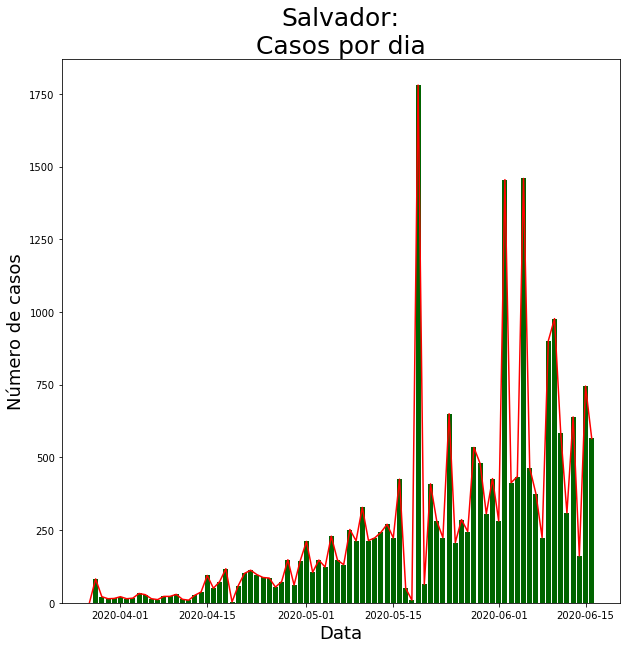

In [27]:
plt.figure(figsize=(10,10))
plt.title('Salvador:\nCasos por dia', fontsize=25)
plt.xlabel('Data', fontsize=18)
plt.ylabel('Número de casos', fontsize=18)
plt.bar(dataSal.data, dataSal.casosNovos, color = 'darkgreen')
plt.plot(dataSal.data, dataSal.casosNovos, color = 'red')

In [29]:
semSal = dataSal.groupby('semanaEpi')
semSal = semSal['casosNovos', 'obitosNovos'].agg(sum).reset_index()
semSal

semanaEpi  casosNovos  obitosNovos
0          13          82            0
1          14         133            5
2          15         138            6
3          16         406            8
4          17         544           19
5          18         797           40
6          19        1242           49
7          20        1925           58
8          21        2817           79
9          22        2707          179
10         23        4933          136
11         24        4008          149
12         25        1471           47

In [46]:
fltr = databa['municipio'] == 'Camaçari'
dataCam = databa[fltr]
semCam = dataCam.groupby('semanaEpi')
semCam = semCam.agg({'casosNovos': sum, 'obitosNovos': sum, 'populacaoTCU2019': 'max'}).reset_index()
semCam.tail(20)

semanaEpi  casosNovos  obitosNovos  populacaoTCU2019
0          13           1            0            299132
1          14           4            0            299132
2          15           5            0            299132
3          16          12            0            299132
4          17          13            1            299132
5          18          11            0            299132
6          19          22            2            299132
7          20          32            1            299132
8          21          40            0            299132
9          22          60            0            299132
10         23         188            3            299132
11         24         155            4            299132
12         25          49            2            299132

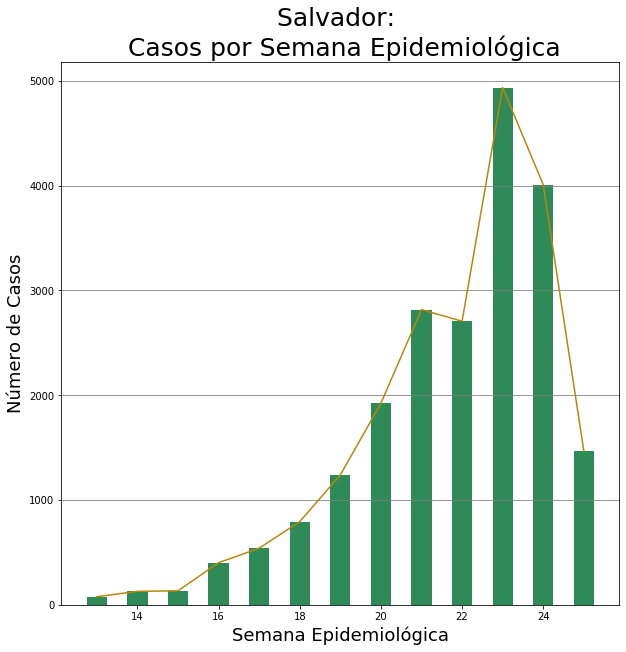

In [30]:
plt.figure(figsize=(10,10))
plt.title('Salvador: \n Casos por Semana Epidemiológica', fontsize=25)
plt.xlabel('Semana Epidemiológica', fontsize=18)
plt.ylabel('Número de Casos', fontsize=18)
plt.grid(axis='y', color='grey')
plt.bar(semSal['semanaEpi'], semSal['casosNovos'], color= 'seagreen', width=.5)
plt.plot(semSal['semanaEpi'], semSal['casosNovos'], color = 'darkgoldenrod')

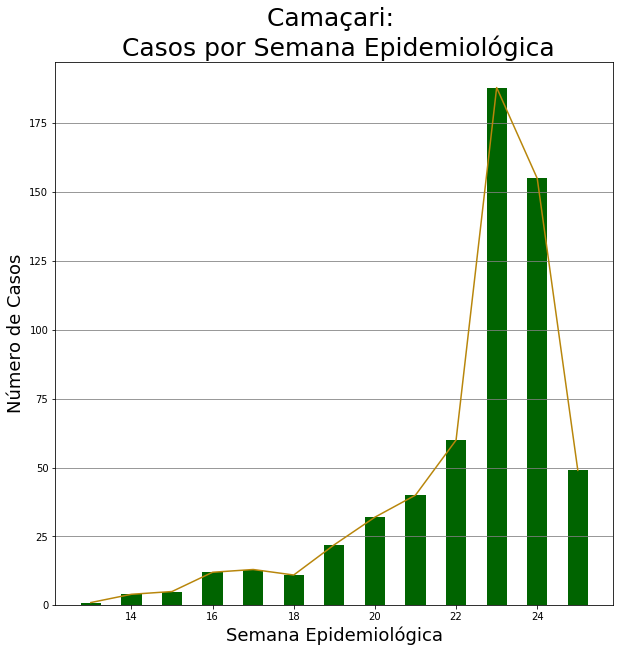

In [48]:
plt.figure(figsize=(10,10))
plt.title('Camaçari: \n Casos por Semana Epidemiológica', fontsize=25)
plt.xlabel('Semana Epidemiológica', fontsize=18)
plt.ylabel('Número de Casos', fontsize=18)
plt.grid(axis='y', color='grey')
plt.bar(semCam['semanaEpi'], semCam['casosNovos'], color= 'darkgreen', width=.5)
plt.plot(semCam['semanaEpi'], semCam['casosNovos'], color = 'darkgoldenrod')

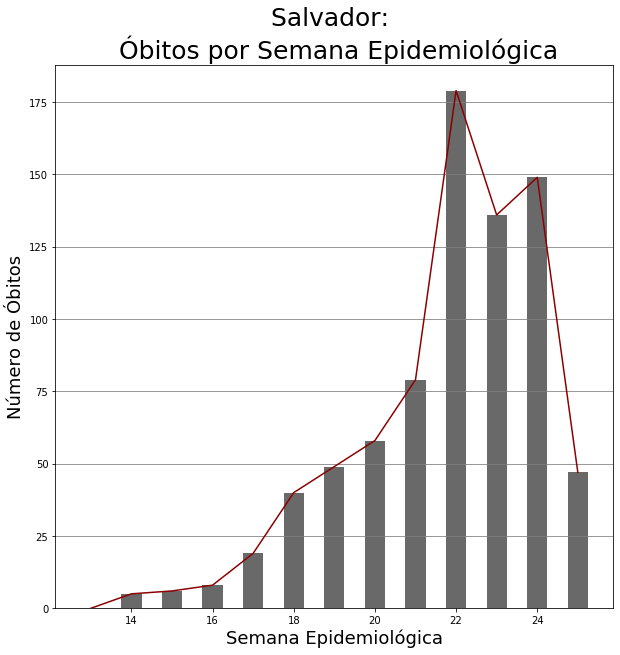

In [31]:
plt.figure(figsize=(10,10))
plt.grid(axis='y', color='grey')
plt.title('Salvador: \n Óbitos por Semana Epidemiológica', fontsize=25)
plt.xlabel('Semana Epidemiológica', fontsize=18)
plt.ylabel('Número de Óbitos', fontsize=18)
plt.bar(semSal['semanaEpi'], semSal['obitosNovos'], color= 'dimgray', width=.5)
plt.plot(semSal['semanaEpi'], semSal['obitosNovos'], color = 'darkred')

In [32]:
mapa = gpd.read_file('./data/ba/IGBE_-_Municipal_-_Atual.shp')
mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEOCODIG_M  417 non-null    int64   
 1   UF          417 non-null    object  
 2   Sigla       417 non-null    object  
 3   Nome_Munic  417 non-null    object  
 4   Região      417 non-null    object  
 5   Mesorregiã  417 non-null    object  
 6   Nome_Meso   417 non-null    object  
 7   Microrregi  417 non-null    object  
 8   Nome_Micro  417 non-null    object  
 9   Num_Reg     417 non-null    int64   
 10  Nome_Reg    417 non-null    object  
 11  Perimeter   417 non-null    float64 
 12  Area        417 non-null    float64 
 13  geometry    417 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(9)
memory usage: 45.7+ KB


In [33]:
munibaMapa = muniba.agg({'casosNovos': sum, 'obitosNovos': sum, 'populacaoTCU2019': 'max'})

In [34]:
munibaMapa.head()

casosNovos  obitosNovos  populacaoTCU2019
municipio                                           
Abaré               0            0             20086
Abaíra              5            0              8739
Acajutiba           5            0             15159
Adustina            7            1             17040
Aiquara             9            1              4446

In [35]:
mapa2 = mapa.join(munibaMapa, on='Nome_Munic', how= 'left')
mapa2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   GEOCODIG_M        417 non-null    int64   
 1   UF                417 non-null    object  
 2   Sigla             417 non-null    object  
 3   Nome_Munic        417 non-null    object  
 4   Região            417 non-null    object  
 5   Mesorregiã        417 non-null    object  
 6   Nome_Meso         417 non-null    object  
 7   Microrregi        417 non-null    object  
 8   Nome_Micro        417 non-null    object  
 9   Num_Reg           417 non-null    int64   
 10  Nome_Reg          417 non-null    object  
 11  Perimeter         417 non-null    float64 
 12  Area              417 non-null    float64 
 13  geometry          417 non-null    geometry
 14  casosNovos        374 non-null    float64 
 15  obitosNovos       374 non-null    float64 
 16  populacaoTCU2019  

In [36]:
mapa2['obitos_p_mil_habitantes'] = mapa2['obitosNovos']*1000 / mapa2['populacaoTCU2019']
mapa2.sort_values(by='obitos_p_mil_habitantes', axis=0, ascending=False).head()


GEOCODIG_M  UF Sigla  Nome_Munic    Região Mesorregiã  \
402     2932705  29    BA     Uruçuca  Nordeste       2907   
292     2923902  29    BA  Pau Brasil  Nordeste       2907   
139     2911501  29    BA     Gongogi  Nordeste       2907   
57      2904704  29    BA   Buerarema  Nordeste       2907   
335     2927408  29    BA    Salvador  Nordeste       2905   

                     Nome_Meso Microrregi      Nome_Micro  Num_Reg  \
402                 Sul Baiano      29031  Ilhéus-Itabuna        4   
292                 Sul Baiano      29031  Ilhéus-Itabuna        4   
139                 Sul Baiano      29031  Ilhéus-Itabuna        4   
57                  Sul Baiano      29031  Ilhéus-Itabuna        4   
335  Metropolitana de Salvador      29021        Salvador        1   

                      Nome_Reg  Perimeter      Area  \
402                Litoral Sul   1.206452  0.027768   
292                Litoral Sul   1.336269  0.051301   
139                Litoral Sul   1.081193  0.016554   
57                 Litoral Sul   0.704684  0.017582   
335  Metropolitana de Salvador   1.347358  0.058874   

                                              geometry  casosNovos  \
402  POLYGON ((-39.04426 -14.39990, -39.04237 -14.4...       200.0   
292  POLYGON ((-39.63159 -15.30130, -39.63115 -15.3...        18.0   
139  POLYGON ((-39.66565 -14.21455, -39.65145 -14.2...        16.0   
57   POLYGON ((-39.22109 -14.91220, -39.21517 -14.9...        44.0   
335  POLYGON ((-38.63542 -12.75189, -38.62575 -12.7...     21203.0   

     obitosNovos  populacaoTCU2019  obitos_p_mil_habitantes  
402         13.0           20519.0                 0.633559  
292          3.0            9831.0                 0.305157  
139          2.0            7128.0                 0.280584  
57           5.0           18349.0                 0.272494  
335        775.0         2872347.0                 0.269814

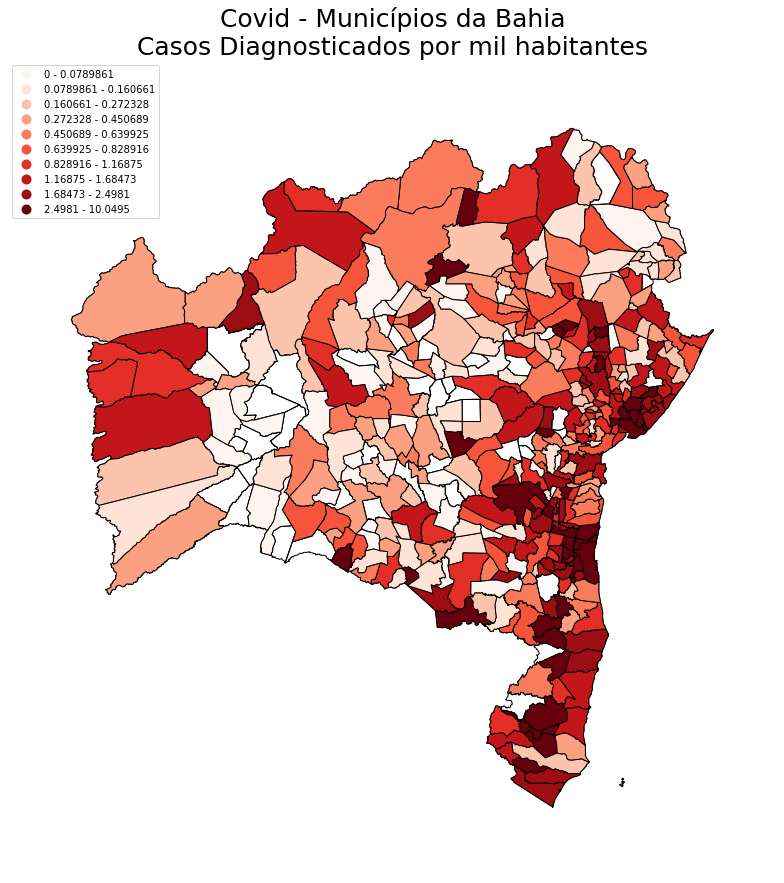

In [37]:
mapa2.dropna(inplace=True)
casos_p_habitante = mapa2['casosNovos']*1000 / mapa2['populacaoTCU2019']
scheme = mapclassify.Quantiles(casos_p_habitante, k=10)

fig, ax1 = plt.subplots(1, 1, figsize=(15,15))

geoplot.polyplot(mapa, ax=ax1)

plt.title('Covid - Municípios da Bahia\nCasos Diagnosticados por mil habitantes', fontsize=25 )
geoplot.choropleth(
    mapa2, hue=casos_p_habitante, scheme=scheme, ax=ax1,
    cmap='Reds', legend=True
)

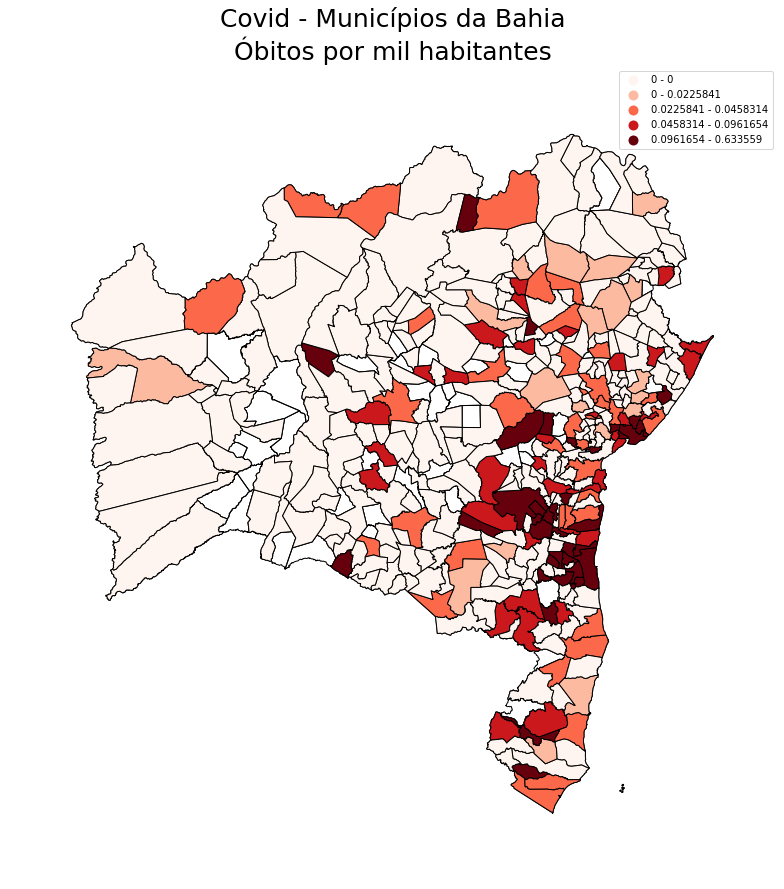

In [49]:
obitos_p_habitante = mapa2['obitosNovos']*1000 / mapa2['populacaoTCU2019']
scheme = mapclassify.Quantiles(obitos_p_habitante, k=10)

fig, ax1 = plt.subplots(1, 1, figsize=(15,15))

geoplot.polyplot(mapa, ax=ax1)

plt.title('Covid - Municípios da Bahia\nÓbitos por mil habitantes', fontsize=25 )
geoplot.choropleth(
    mapa2, hue=obitos_p_habitante, scheme=scheme, ax=ax1,
    cmap='Reds', legend=True
)